## 비정형 데이터
- 차원축소
  - 사과 사진 : 10,000 픽셀 == 10,000 특성
  - 각각의 픽셀들이 특성들을 가지고 있다
  - -> too much : 압축 필요
  - 압축 후 데이터의 원본(원 데이터의 특성) 사라짐
  - 실행 결과 : 
  <br/>
  (1) 핵심 정보만 남음 (압축) <br/>
  (2) 데이터의 크기가 작아짐
- 대표적인 기법 : 주성분 분석(Principal Component Analysis)
  - 공분산 행렬
  - 분산 (Variance) : 데이터가 평균으로부터 퍼진 정도
  - 고유벡터(Eigenvector)

In [78]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-10-24 02:16:27--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-24 02:16:27--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-24 02:16:28--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

## 데이터셋 정의
- 300 : 데이터 샘플의 갯수
- 100 : 이미지의 높이
- 100 : 이미지의 너비

In [79]:
import numpy as np
fruits = np.load('fruits_300.npy')
# 300장 데이터, 100*100차원
fruits.shape

(300, 100, 100)

- 0~255의 정숫값으로 표현
  - 0에 가까울수록 검정
  - 255에 가까울수록 흰색

In [80]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


## 이미지 시각화

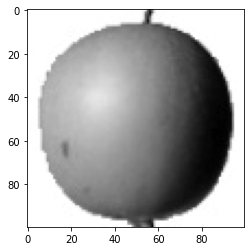

In [81]:
import matplotlib.pyplot as plt
# plt.imshow(fruits[0], cmap='gray')
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

- 파인애플, 바나나 이미지 출력

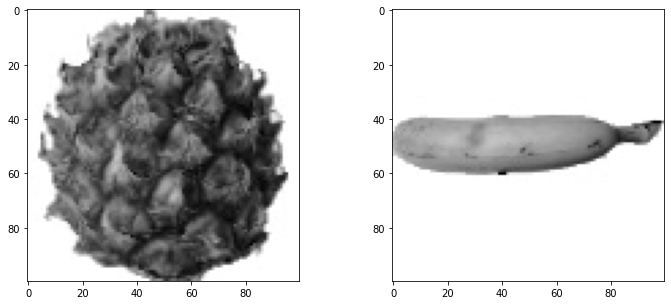

In [82]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(fruits[100], cmap='gray_r')
ax[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀값 분석
- 3차원 데이터들 -> 2차원 or 1차원으로 변경

In [83]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape, pineapple.shape, banana.shape)

(100, 10000) (100, 10000) (100, 10000)


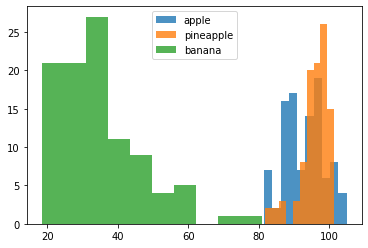

In [84]:
plt.hist(np.mean(apple, axis=1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.8)
plt.hist(np.mean(banana, axis=1), alpha = 0.8)
plt.legend(['apple', 'pineapple','banana'])
plt.show()

- 각 픽셀의 평균 시각화

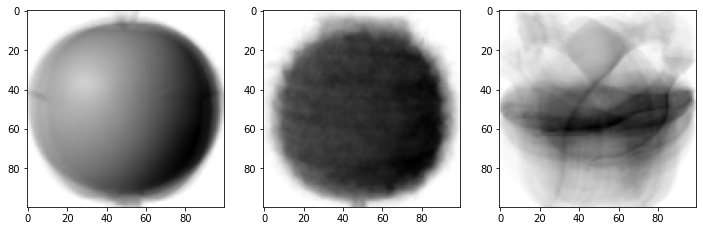

In [85]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(apple_mean, cmap='gray_r')
ax[1].imshow(pineapple_mean, cmap='gray_r')
ax[2].imshow(banana_mean, cmap='gray_r')

plt.show()

- 평균값과 가까운 사진 고르기

In [86]:
abs_diff = np.abs(fruits - apple_mean) # 분산

# 각각의 샘플의 오차의 평균
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


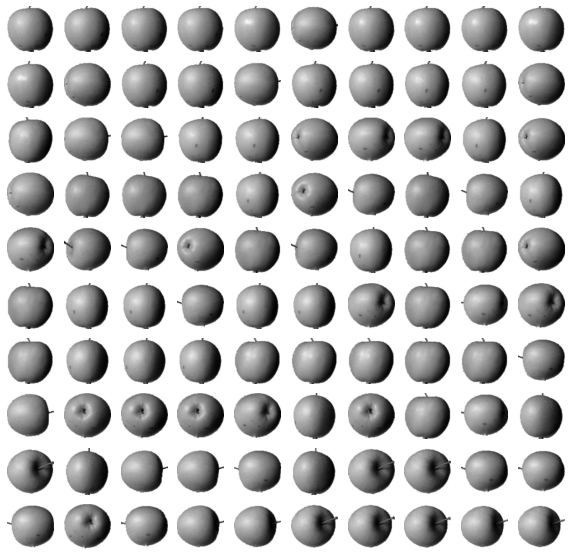

In [87]:
apple_index = np.argsort(abs_mean)[:100]
fig, ax = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    ax[i,j].axis('off')

plt.show()

In [88]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

## PCA 변환

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [90]:
print(pca.components_.shape)

(50, 10000)


In [91]:
# 50장 데이터에 100*100 차원
pca.components_.reshape(-1, 100, 100).shape

(50, 100, 100)

In [92]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

- 주성분
  - 원본 데이터중 가장 분산이 큰 방향을 순서대로 나타낸 것.

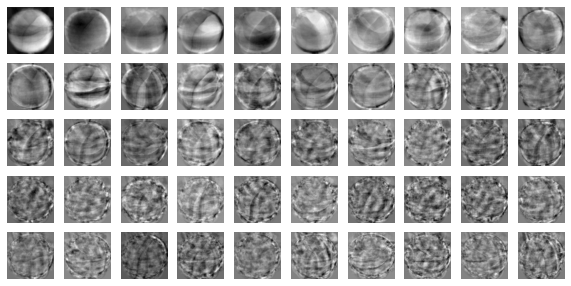

In [93]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 10000개의 특성을 50개 주성분으로 표현해도, 데이터의 원래 "의미"는 보전
 - 의미 : 사과모양의 "구" 모양

In [94]:
fruits_2d.shape

(300, 10000)

In [95]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- -> 딥러닝 프로세스 진행

## PCA의 최종목적
- 데이터의 특성이 만개에서 30개로 줄어듬
- 데이터 용량이 감소
- 딮러닝/머신러닝 -> 매우 시간 절약


## 원본 데이터 재구성

In [96]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


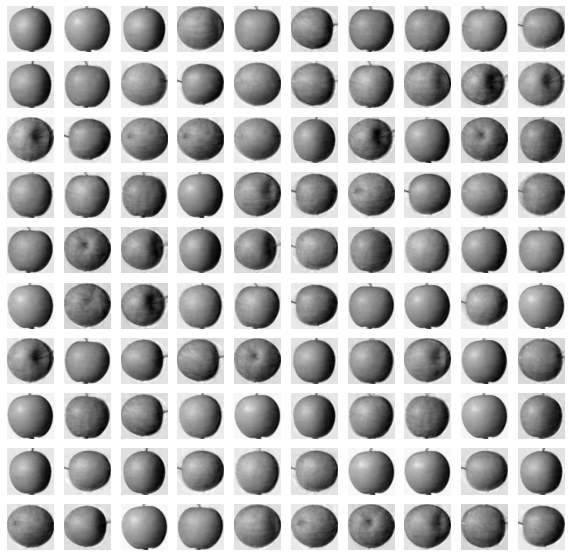

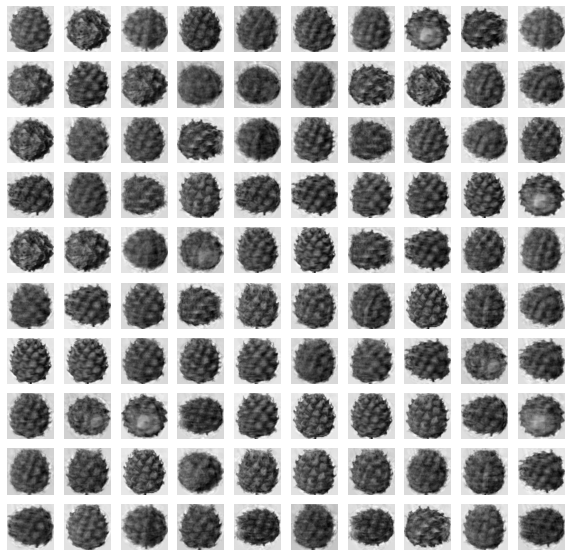

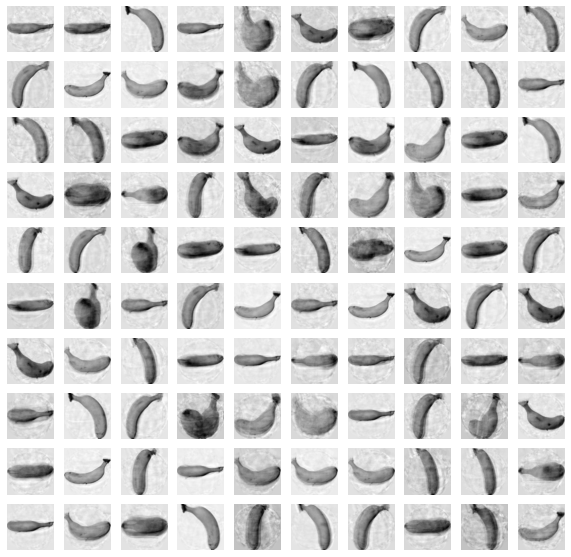

In [97]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for i in [0,100,200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

## 설명된 분산(Explained Variance)
- 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [98]:
print(np.sum(pca.explained_variance_ratio_))

0.9215488639090053


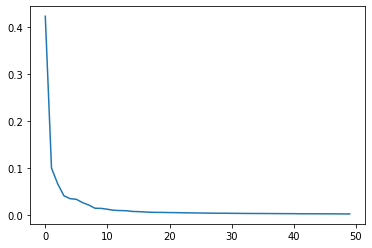

In [99]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 주성분 n_components = 10으로해도 50이랑 그닥 그렇게 다르지는 않다

## 다른 알고리즘과 함께 사용하기

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [101]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [102]:
from sklearn.model_selection import cross_validate
scores = cross_validate (lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # 99.6%
print(np.mean(scores['fit_time'])) # 1초

0.9966666666666667
1.1730617046356202


In [103]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03378772735595703
